# Zeros de Função

Em muitas situações práticas, estamos interessados em encontrar uma solução de uma equação não linear.
Quando a equação tem alguma forma especial, como as equações afins e quadráticas, a solução pode ser obtida facilmente. Em alguns casos, uma equação aparentemente complicada pode ter uma solução através de alguns truques.
Por exemplo, a equação
$$ 4^{x} - 5\times2^{x} + 6 = 0, $$
pode ser resolvida considerando $y = 2^x$ e resolvendo uma equação quadrática.

No entanto, existem casos em que não é fácil encontrar essa solução, ou ainda que não é possível.
O exemplo mais clássico disso é a equação
$$ xe^x = 1, $$
cuja solução é a constante $\Omega$, com valor perto de $0.567$. Essa constante, como $\pi$ e $e$, é transcedental.

De uma maneira mais geral, dado uma função $f$ contínua num intervalo $[a,b]$, procuramos ao menos um valor de $x \in [a,b]$ tal que
$$ f(x) = 0. $$

Uma aplicação um pouco mais prático é o de encontrar a taxa de juros de uma compra feita utilizando um financiamento pela tabela Price. Por exemplo, no financiamento de um carro.
A equação que relaciona os valores da tabela Price é
$$ p = V \frac{ (1+i)^n i }{ (1 + i)^n - 1},$$
onde $p$ é o valor da parcela, $V$ é o valor  do produto pago à vista no presente, $n$ é o número de parcelas e $i$ é a taxa de Juros. Note que para $i = 0$ essa equação não está definida, no entanto,
faz sentido que
- fisicamente, se não temos juros, temos uma divisão normal: $p = \dfrac{V}{n}$,
- matematicamente, quando $i \to 0$, temos

In [1]:
n = 144
V = 80_000
i = 0.03
p = V*(1+i)^n*i/( (1+i)^n - 1)

2434.502443812203

In [2]:
n = 48
i = 0.1 / 100
V = 40_000
p = V*(1+i)^n*i/( (1+i)^n - 1)

853.9098445091832

In [3]:
n = 48
V = 40_000
p = 900
#i = ?

900

\begin{align}
\lim_{i \to 0} \frac{(1 + i)^n i}{(1 + i)^n - 1}
& = \lim_{y \to 1} \frac{y^n (y - 1)}{y^n - 1} \\
& = \lim_{y \to 1} \frac{y^{n+1} - y^n}{y^n - 1} \\
& = \lim_{y \to 1} \frac{(n+1)y^n - ny^{n-1}}{ny^{n-1}} \\
& = \frac{(n+1) - n}{n} \\
& = \frac{1}{n},
\end{align}

onde a última igualdade do limite segue de L'Hôpital. Daí, temos $\displaystyle \lim_{i \to 0} p = \dfrac{V}{n}$.
Então, uma maneira de deixar essa função contínua é definir
$$ f(i) = \left\{\begin{array}{ll}
p - V \dfrac{(1+i)^n i}{(1+i)^n-1}, & i \neq 0, \\
p - \dfrac{V}{n}, & i = 0.
\end{array}\right.$$

Vamos ver agora como resolver esse problema.

# Método da bissecção

O método da bissecção é um método bastante simples de se entender, de explicar, e de implementar, por isso é um dos favoritos.

A base do método é o Teorema do Valor Intermediário:

**Teorema do Valor Intermediário:**Se $f$ é contínua em $[a,b]$ e $f(a)$ e $f(b)$ têm sinais opostos, então existe $c \in [a,b]$ tal que $f(c) = 0$.

O método da bissecção simplesmente toma o intervalo $[a,b]$ e divide-o em dois, digamos $[a,c]$ e $[c,b]$.
Caso tenhamos sorte, o ponto $c$ será um zero da função $f$, isto é, $f(c) = 0$. Caso contrário, o sinal de $f(c)$ será oposto à ou $f(a)$, ou $f(b)$. Desse modo, um dos intervalos $[a,c]$ ou $[c,b]$ terá um zero, pelo TVI. Logo, podemos repetir o processo.

Antes de considerar os detalhes de algum algoritmo que implemente o método da bissecção, vamos considerar
a convergência do método, definido matematicamente. Para tanto, definimos a seguinte hipótese

- **H-B1:** $f$ é contínua em $[a,b]$, $a < b$ e $f(a)$ e $f(b) têm sinais opostos.

Podemos definir duas sequências para o método da bissecção: $\{a_k\}$ e $\{b_k\}$, onde
$[a_0,b_0] = [a,b]$ é o intervalo inicial dado, e cada intervalo $[a_k,b_k]$ é gerado na iteração $k$
do método, da seguinte maneira:
- Define-se $x_k = \dfrac{a_{k-1} + b_{k-1}}{2}$;
- Caso $f(x_k) = 0$, define-se $a_k = b_k = x_k$;
- Caso contrário, se $f(a_{k-1})$ e $f(x_k)$ tenham sinais diferentes, define-se $a_k = a_{k-1}$ e $b_k = x_k$;
- Caso nenhum dos casos anteriores aconteça, define-se $a_k = x_k$ e $b_k = b_{k-1}$.
Vamos agora demonstrar que o intervalo $[a_k,b_k]$ vai se fechando ao redor de um zero de $f$.

**Lema:** Suponha que vale H-B1 e que $a_k < b_k$, então $f(a_k)$ e $f(b_k)$ têm sinais opostos.

*Dem.:* Primeiro, veja que $x_j$ não é zero de $f$ em nenhuma iteração $j = 1,\dots,k$. Caso contrário, teríamos $a_j = b_j = x_j = a_k = b_k$, que não é o caso.
Agora, demonstramos o resultado por indução.

Se $f(a)$ e $f(x_1)$ têm sinais diferentes, então $a_1 = a$ e $b_1 = x_1$, e fica provado.
Caso contrário, $a_1 = x_1$ e $b_1 = b$. Mas $f(a)$ e $f(x_1)$ têm sinais iguais, e $f(b)$ e $f(a)$ têm sinais opostos. Logo, $f(x_1)$ e $f(b)$ têm sinais opostos, e fica provado.

Suponha que vale para $k-1$.
No caso de $f(a_{k-1})$ e $f(x_k)$ terem sinais diferentes, então fica claro que $f(a_k) = f(a_{k-1})$ e
$f(b_k) = f(x_k)$ têm sinais diferentes.
Falta analisar o caso contrário.
Temos que $a_k = x_k$ e que $b_k = b_{k-1}$, então temos que mostrar que $f(x_k)$ e $f(b_{k-1})$ têm sinais opostos. Mas como $f(a_{k_1})$ e $f(x_k)$ têm o mesmo sinal, e por hipótese de indução, temos $f(a_{k-1})$ e $f(b_{k-1})$ têm sinais opostos, então $f(x_k)$ e $f(b_{k-1})$ têm sinais opostos, e fica provado.
$\blacksquare$

O Lema acima serve para mostrar que em cada iteração do método da bissecção, teremos as hipóteses do Teorema do Valor Intermediário satisfeitas. Agora vamos para o Teorema que diz que as sequências convergem.

**Teorema (de convergência do método da bissecção):**
Sob a hipóteses H-B1, o método da bissecção gera sequências $\{a_k\}$ e $\{b_k\}$ convergentes, ambas para um mesmo valor $c \in [a,b]$ com $f(c) = 0$.

*Dem.:* Primeiro, se existe alguma iteração onde $x_k$ satisfaz $f(x_k) = 0$, então $a_k = b_k = x_k$ e depois disso, $a_j = b_j = x_k$ para todo $j > k$. Sendo assim, trivialmente essa sequência converge, para $c \equiv x_k$.

Suponha agora que não existe $x_k$ tal que $f(x_k) = 0$.
Note que
$$a \leq a_1 \leq \dots \leq a_k \leq \dots \leq b_k \leq \dots \leq b_1 \leq b. $$
Isso quer dizer que a sequência $\{a_k\}$ é não decrescente e limitada superiormente. Portanto, é convergente.
Por outro lado, a sequência $\{b_k\}$ é não crescente e limitada inferiormente. Portanto, também é convergente.
Não somente isso, mas pela definição de $x_k$, temos
$$ b_k - a_k = \dfrac{b_{k-1} - a_{k-1}}{2} = \dfrac{b - a}{2^k}, $$
de modo que $b_k - a_k \rightarrow 0$. Como $b_k \rightarrow b^*$ e $a_k \rightarrow a^*$, então
$b_k - a_k \rightarrow b^* - a^* = 0$. Portanto $a^* = b^*$, isto é, ambas sequências convergem para um mesmo valor, que denotaremos de $c$.

Para mostrar que $f(c) = 0$, note que pela Lema anterior, como $a_k < b_k$, temos que $f(a_k)$ e $f(b_k)$ têm sinais diferentes. Sendo assim, existe $c_k \in (a_k,b_k)$ tal que $f(c_k) = 0$.
Como $a_k < c_k < b_k$, pelo Teorema do Confronto, temos que $c_k \rightarrow c$.
Pela continuidade da função $f$, temos que $f(c_k) \rightarrow f(c)$, que implica em $f(c) = 0$.
$\blacksquare$

O pseudo-código para o método está abaixo.

In [4]:
#=
    Entrada: f, a, b tais que f(a) * f(b) < 0
1. x ← (a + b) / 2
2. Enquanto f(x) ≠ 0
    1. Se f(a) * f(x) < 0
        b ← x
    2. Senão,      # isto é, f(b) * f(x) < 0
        a ← x
    3. x ← (a + b) / 2
3. Retorne x
    Saída: x tal que f(x) = 0
=#

In [4]:
a, b = 1.0, 2.0
f(x) = x^2 - 2

f (generic function with 1 method)

In [5]:
f(a) * f(b)

-2.0

In [6]:
a, b

(1.0, 2.0)

In [20]:
x = (a + b) / 2
if f(a) * f(x) < 0
    b = x
else
    a = x
end
a, b

(1.4141845703125, 1.41424560546875)

In [21]:
x

1.41424560546875

In [22]:
f(x)

9.063258767127991e-5

In [23]:
x^2

2.0000906325876713

In [36]:
function bisseccao(f, a, b; tol = 1e-8)
    fa = f(a)
    x = (a + b) / 2
    fx = f(x)
    while abs(fx) > tol
        x = (a + b) / 2
        fx = f(x)
        if fa * fx < 0
            b = x
        else
            a = x
            fa = fx
        end
    end
    return x, fx
end

bisseccao (generic function with 1 method)

In [37]:
bisseccao(x -> x^2 - 2, 1, 2)

(1.4142135605216026, -5.236811428943611e-9)

In [38]:
bisseccao(x -> x^2 - 2, 1, 2, tol=1e-4)

(1.4141845703125, -8.200109004974365e-5)

Note que chamados esse processo de *método* da bissecção, não de *algoritmo* de bissecção.
Essa é uma diferença importante e recorrente.
Aqui, a cerne do nosso estudo é o "miolo" do algoritmo, isto é, como definir algo
matematicamente de modo que propriedades teóricas sejam satisfeitas.
Em geral, as condições de parada não ficam bem estabelecidas num método.
Além disso, existe a questão das *hipóteses de entrada*. Quando não são satisfeitas,
um algoritmo deve lidar com isso, enquanto que o método é definido supondo tais
hipóteses.
Além das hipóteses de entrada, existem as *hipóteses de convergência*, que serão
definidas posteriormente para mostrar que o método funciona.
Algumas dessas hipóteses não podem ser testadas computacionalmente, por exemplo
a continuidade da função $f$. No entanto, essa hipótese é essencial para que o
método funcione. Muitas vezes, as hipóteses de entrada e de convergência aparecem simplesmente como hipóteses.
Computacionalmente, devemos adicionar critérios de parada adicionais para garantir
a finitude do algoritmo. Isso foi visto, por exemplo, quando trabalhamos com a sequência
de Collatz.

## Critério de sucesso

Uma questão importante neste método, e em muitos outros métodos matemáticos, é que $f(x) = 0$ pode não acontecer em tempo finito, assim como pode não ser possível computacionalmente.
Por exemplo, a sequência $x_k = 1/k$ converge para $0$, mas nunca chegará nela em tempo finito se cada iteração levar uma quantidade de tempo $t \geq t_{\min} > 0$.

Por outro lado, veja o exemplo abaixo para a função
$$ f(x) = \bigg(\cos(x) - \frac{1}{2}\bigg)^2, $$
onde buscamos uma solução no intervalo $[0,\pi]$ (que é $\pi/3$).

In [39]:
f(x) = (cos(x) - 0.5)^2
s = pi/3
sn = nextfloat(s)
sn2 = nextfloat(sn)
sp = prevfloat(s)

println("Solução esperada: s = π/3 = $s")
println("f(s) = $(f(s))")
println("Próximo ponto flutuante: sn = $sn")
println("f(sn) = $(f(sn))")
println("Próximo ponto flutuante: sn2 = $sn2")
println("f(sn2) = $(f(sn2))")
println("Ponto flutuante antes de s: sp = $sp")
println("f(sp) = $(f(sp))")

Solução esperada: s = π/3 = 1.0471975511965976
f(s) = 1.232595164407831e-32
Próximo ponto flutuante: sn = 1.0471975511965979
f(sn) = 1.232595164407831e-32
Próximo ponto flutuante: sn2 = 1.047197551196598
f(sn2) = 7.703719777548943e-32
Ponto flutuante antes de s: sp = 1.0471975511965974
f(sp) = 1.1093356479670479e-31


Isso sem falar no problema de escalamento:

In [40]:
f(x) = 1e50 * (cos(x) - 0.5)^2
s = pi/3
sn = nextfloat(s)
sn2 = nextfloat(sn)
sp = prevfloat(s)

println("Solução esperada: s = π/3 = $s")
println("f(s) = $(f(s))")
println("Próximo ponto flutuante: sn = $sn")
println("f(sn) = $(f(sn))")
println("Próximo ponto flutuante: sn2 = $sn2")
println("f(sn2) = $(f(sn2))")
println("Ponto flutuante antes de s: sp = $sp")
println("f(sp) = $(f(sp))")

Solução esperada: s = π/3 = 1.0471975511965976
f(s) = 1.232595164407831e18
Próximo ponto flutuante: sn = 1.0471975511965979
f(sn) = 1.232595164407831e18
Próximo ponto flutuante: sn2 = 1.047197551196598
f(sn2) = 7.703719777548944e18
Ponto flutuante antes de s: sp = 1.0471975511965974
f(sp) = 1.1093356479670479e19


Ambos os problemas podem ser resolvidos lembrando que estamos trabalhando com aproximações dos valores pela máquina, e que então devemos ter uma **tolerância** para o quão próximo de $0$ aceitaremos que um valor esteja.

A maneira mais simples de tentar resolver esse problema é utilizar uma **tolerância absoluta** $\epsilon_a > 0$:
se $|f(x)| \leq \epsilon_a$, então consideramos que $x$ é uma boa aproximação para um zero da função.
Como visto acima, no entanto, podemos ter $f$ multiplicada por alguma constante muito grande, que acaba desnivelando completamente nosso teste. Uma maneira de tentar resolver esse problema é utilizar uma
**tolerância relativa**, onde multiplicamos uma constante $\epsilon_r > 0$ por algum valor de referência.
O valor de referência ideal deve conseguir identificar a escala de $f$ perto da solução. Uma maneira de fazer isso é utilizar algum valor de $f(x_k)$ como referência. Como não temos nenhuma informação de quantas informações serão necessárias para se chegar perto da solução, podemos utilizar o primeiro valor de $f$ como referência, isto é $f(x_0)$. Dessa maneira, se $|f(x)| \leq \epsilon_r |f(x_0)|$, então $x$ é uma boa aproximação para um zero da função.

Nossos problemas não acabaram ainda: qual critério utilizar? O absoluto ou o relativo? No primeiro exemplo, qualquer um dos dois funcionaria começando numa distância razoável da solução (o número de iterações pode ser diferente). No segundo exemplo, só o relativo funcionaria. No entanto, podemos ter um exemplo onde a tolerância relativa não funciona, mas a absoluta funcionaria.

In [7]:
f(x) = (cos(pi/3 + 1e-50 * (x - pi/3)) - 0.5)^2
s = pi/3
sn = nextfloat(s)
sn2 = nextfloat(sn)
sp = prevfloat(s)

println("Solução esperada: s = π/3 = $s")
println("f(s) = $(f(s))")
println("Próximo ponto flutuante: sn = $sn")
println("f(sn) = $(f(sn))")
println("Próximo ponto flutuante: sn2 = $sn2")
println("f(sn2) = $(f(sn2))")
println("Ponto flutuante antes de s: sp = $sp")
println("f(sp) = $(f(sp))")

println("x₀ = 0.0, f(x₀) = $(f(0.0))")

Solução esperada: s = π/3 = 1.0471975511965976
f(s) = 1.232595164407831e-32
Próximo ponto flutuante: sn = 1.0471975511965979
f(sn) = 1.232595164407831e-32
Próximo ponto flutuante: sn2 = 1.047197551196598
f(sn2) = 1.232595164407831e-32
Ponto flutuante antes de s: sp = 1.0471975511965974
f(sp) = 1.232595164407831e-32
x₀ = 0.0, f(x₀) = 1.232595164407831e-32


Uma maneira que está sendo utilizada com mais frequência é uma combinação das duas tolerâncias.
$$ |f(x)| \leq \epsilon_a + \epsilon_r |f(x_0)|. $$
Em geral, vamos considerar uma combinação das duas condições quando possível.

Os valores de $\epsilon_a$ e $\epsilon_r$ variam de acordo com a aplicação e a necessidade de aproximações mais precisas. Os valores mais comuns são da ordem de $10^{-4}$, $10^{-6}$ e $10^{-8}$.

## Critérios de parada / escape

Além do critério acima, precisamos definir outros critérios para obter a finitude.
Um ponto interessante em muitos métodos matemáticos é que

> *Mesmo que a condição de parada de sucesso não seja satisfeita, a saída do programa ainda pode ser útil.*

Esse é um conceito importante em muitos problemas. Em particular, em alguns problemas de programação linear e inteira, uma solução precisa pode ser computacionalmente inviável (anos para se obter). O comum nesses casos, é estabelecer limites para o tempo de execução, iterações, memória, etc., e utilizar a melhor solução obtida até então.

Alguns dos critérios de paradas mais utilizados:
- Progresso lento (e.g., a distância entre $x_k$ e $x_{k-1}$ ficou muito pequena, $b_k - a_k$ está muito pequeno, etc.);
- Limite de tempo;
- Limite de iterações;
- Limite de algum outro gasto - principalmente avaliações de função;
- Falha na satisfação de alguma hipótese.

Antes de olhar a implementação abaixo, faça uma implementação bastante simples do método da bissecção.
Teste com a função $f(x) = xe^x - 1$ no intervalo $[0, 1]$.

In [25]:
"""
    bisseccao(f, a, b; atol=1e-6, rtol=1e-6, maxiter=10_000)

Calcula um zero para `f` no intervalo `[a,b]` utilizando o método da bissecção.
Se `f(a) * f(b) > 0`, então retorna um erro.

Saída: `xₖ, f(xₖ), k`

    xₖ    - aproximação para um zero de f
    f(xₖ) - f aplicada nessa aproximação
    k     - número de iterações
"""
function bisseccao(f::Function, a::Real, b::Real; atol=1e-6, rtol=1e-6, maxiter=10_000)
    (fa, fb) = (f(a), f(b))
    ϵ = atol + rtol * (abs(fa) + abs(fb)) / 2
    if abs(fa) <= ϵ
        return a, fa, 0
    elseif abs(fb) <= ϵ
        return b, fb, 0
    elseif fa * fb > 0
        error("f(a) e f(b) devem ter sinais diferentes")
    end
    x = (a + b) / 2
    fx = f(x)
    iter = 1
    
    funcionou = abs(fx) ≤ ϵ
    explodiu = iter > maxiter
    
    #while !(abs(fx) <= ϵ || iter > maxiter)
    while !(funcionou || explodiu)
    #while abs(fx) > ϵ && iter ≤ maxiter
        
        if fx * fa < 0
            b, fb = x, fx
        else
            a, fa = x, fx
        end
    
        x = (a + b) / 2
        fx = f(x)
        iter += 1
        
        funcionou = abs(fx) ≤ ϵ
        explodiu = iter > maxiter
    end
    
    return x, fx, iter
end

bisseccao

In [42]:
?bisseccao

search: bisseccao



```
bisseccao(f, a, b; atol=1e-6, rtol=1e-6, maxiter=10_000)
```

Calcula um zero para `f` no intervalo `[a,b]` utilizando o método da bissecção. Se `f(a) * f(b) > 0`, então retorna um erro.

Saída: `xₖ, f(xₖ), k`

```
xₖ    - aproximação para um zero de f
f(xₖ) - f aplicada nessa aproximação
k     - número de iterações
```


In [44]:
xtil, fx, iter = bisseccao(x->x^2 - 2, 1, 2)

(1.4142131805419922, -1.0799813026096672e-6, 19)

In [45]:
xtil^2

1.9999989200186974

In [46]:
x = sqrt(2)

1.4142135623730951

In [47]:
Erro = x - xtil

3.818311029579746e-7

In [48]:
ErroAbs = abs(Erro)

3.818311029579746e-7

In [49]:
ErroRel = ErroAbs/x

2.6999536216952265e-7

In [51]:
xtil, fx, iter = bisseccao(x->x^2 - 2, 1, 2, atol=1e-12, rtol=1e-12)

(1.4142135623733338, 6.754596881819452e-13, 38)

In [52]:
abs(x-xtil)/x

1.6878493930850582e-13

In [53]:
xtil, fx, iter = bisseccao(x->x^2, -1, 3)

ErrorException: f(a) e f(b) devem ter sinais diferentes

In [54]:
xtil, fx, iter = bisseccao(x->x*exp(x) - 1.0, 0, 1, atol=1e-12, rtol=1e-12)

(0.5671432904091489, -1.7544854458151349e-12, 38)

### Exemplo da Tabela Price

Exercício: Faça uma pequena função que recebe $p$, $V$ e $n$ e calcula $i$ correspondente da tabela price. Reveja a introdução do capítulo para pegar os significados das constantes.
Para $V = 10000$ e $n = 10$, compare com os seguintes valores de $p$:
- $p = 1100$;
- $p = 1500$;
- $p = 1000$;
- $p = 990$.

Compare sua solução com a [Calculadora do Cidadão do Banco Central](https://www3.bcb.gov.br/CALCIDADAO/publico/calcularFinanciamentoPrestacoesFixas.do).

Encontre alguma promoção online de venda de carros e compare o juros do anúncio com o juros calculado pela sua calculadora. Note que o valor de entrada é descontado de $V$.

In [62]:
function equacao_price(i, p, V, n)
    # Implemente
    if i == 0
        return p - V / n
    else
        return p - V * i * (1 + i)^n / ((1 + i)^n - 1)
    end
end

function calc_juros(p, V, n :: Int)
    # Implemente
    if p < 0 || V < 0 || n < 1 || p ≥ V
        error("Não é possível")
    end
    f(i) = equacao_price(i, p, V, n)
    a = -1.0
    b = 1.0
    i, fi, k = bisseccao(f, a, b)
    return i
end

calc_juros (generic function with 2 methods)

In [33]:
equacao_price(0.0346015, 120, 1000, 10)

2.3004621965583283e-5

In [34]:
calc_juros(120, 1000, 10)

0.03460121154785156

In [35]:
calc_juros(1100, 10_000, 10)

0.0177154541015625

In [36]:
calc_juros(1500, 10_000, 10)

0.08144187927246094

In [37]:
calc_juros(1000, 10_000, 10)

0.0

In [38]:
calc_juros(990, 10_000, 10)

-0.00182342529296875

In [50]:
calc_juros(-1.0, 10_000, 10)

ErrorException: Não é possível

In [63]:
calc_juros(11000, 10_000, 10)

ErrorException: Não é possível

# Método de Newton

Apesar do método da bissecção ser extremamente simples de se implementar, ele pode ser muito lento.
Uma alternativa é utilizar o método de Newton.
Esse método, com variações em diversas áreas, é um dos métodos mais famosos e importantes.
Um professor costumava dizer:

> *Se você criar alguma coisa e for tão bom quanto Newton, é porque você fez o Newton com alguma outra cara.*

Algumas ressalvas se aplicam na frase acima, mas Newton realmente é considerado um dos melhores métodos para vários problemas. Vamos estudar quando usar o Newton é bom, e quando ele pode falhar.

## Métodos geradores de passos

O método de Newton cai numa categoria de métodos chamada de "geradores de passos".
Um método gerador de passos começa com uma aproximação inicial $x_0$ e define em cada iteração $k$ define um passo
$d_k$ e calcula uma nova iteração fazendo $$x_k = x_{k-1} + d_k.$$

Essa definição é bastante simples, mas é bastante importante numa consideração que não entraremos nesta disciplina:
**paralelismo**. Se tivermos a possibilidade de realizar operações em paralelo e utilizamos um método gerador de passos, ficamos presos na paralelização da iteração $k$. Outros métodos, por exemplo do tipo dividir e conquistar, podem paralelizar cada parte separada às vezes.

### Motivação do Método de Newton

O método de Newton tem duas motivações: *geométrica* e *teórica*.
Ambas seguem da mesma ideia de aproximar a função $f$ por uma função afim em torno da iteração atual.

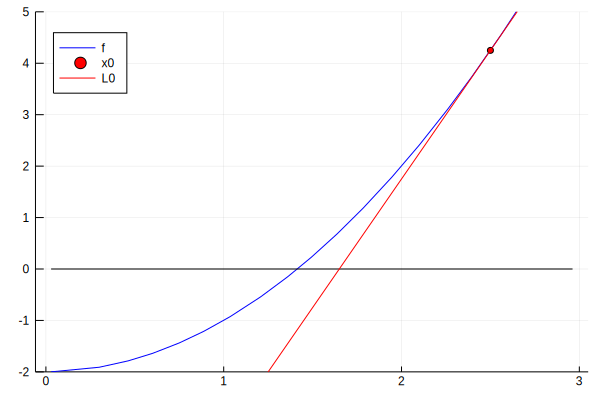

In [64]:
# Motivação geométrica
using Plots
gr(size=(600,400))
f(x) = x^2 - 2
plot(f, 0, 3, c=:blue, lab="f", leg=:topleft)
plot!(x->0, 0, 3, c=:black, lab="")
a = 2.5
scatter!([a], [f(a)], c=:red, lab="x0", ms=3)
L(x) = f(a) + 2 * a * (x - a)
plot!(L, 0, 3, c=:red, lab="L0")
ylims!(-2, 5)

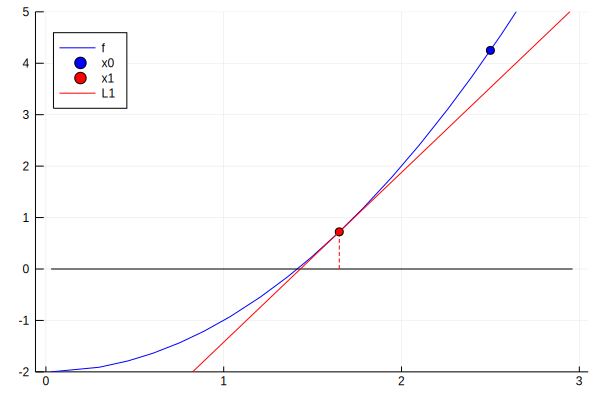

In [65]:
# Motivação geométrica
f(x) = x^2 - 2
plot(f, 0, 3, c=:blue, lab="f", leg=:topleft)
plot!(x->0, 0, 3, c=:black, lab="")
a = 2.5
scatter!([a], [f(a)], c=:blue, lab="x0")
a = a - f(a) / 2a
plot!([a; a], [0; f(a)], l=:dash, c=:red, lab="")
scatter!([a], [f(a)], c=:red, lab="x1")
L(x) = f(a) + 2 * a * (x - a)
plot!(L, 0, 3, c=:red, lab="L1")
ylims!(-2, 5)

#### A motivação é bastante simples: achar o zero de uma função afim é muito mais simples que de uma função não afim.
Então, vamos aproximar a função $f$ por uma função afim na iteração $k$ em torno do ponto $x_{k-1}$, e chamar seu zero de $x_k$. Repetimos o processo até que o critério de convergência seja satisfeito.

Teoricamente, estamos considerando a seguinte aproximação de Taylor:
$$ f(x_{k-1} + d) = f(x_{k-1}) + df'(x_{k-1}) + \frac{d^2}{2}f''(\xi), $$
onde $d$ é o **passo** que estamos tomando, e $\xi$ é um valor entre $x_{k-1}$ e $x_{k-1}+d$.
A aproximação de primeira ordem de $f$ é
$$ L(d) = f(x_{k-1}) + df'(x_{k-1}), $$
e a se $d$ ou $f''(\xi)$ forem muito próximos de zero, então o valor $f(x_{k-1}+d) \approx L(d)$.
Como queremos $f(x_{k-1}+d_k) = 0$, definimos $d_k$ a partir da solução de $L(d_k) = 0$.
Em outras palavras,
$$ f(x_{k-1}) + d_kf'(x_{k-1}) = 0. $$
Desse modo, se $f'(x_{k-1} \neq 0$, temos
$$d_k = -\dfrac{f(x_{k-1})}{f'(x_{k-1})}.$$

Isso nos permite definir a sequência gerada pelo método de Newton por
$$ x_k = x_{k-1} + d_k = x_{k-1} - \frac{f(x_{k-1})}{f'(x_{k-1})}. $$

Em particular, muitas vezes é mais claro escrever para $k+1$:
$$ x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}. $$

Note que essa sequência só está bem definida se $f'(x_k) \neq 0$ para todo $k$.
Além disso, não é trivial ver se essa sequência converge, diferente do que acontece com o método da bissecção.
Por sorte, temos um teorema declarando esse resultado.

**Teorema (da convergência do método de Newton):** Se $f$ é continuamente diferenciável no intervalo $[a,b]$ e
existe $c \in (a,b)$ tal que $f(c) = 0$ e $f'(c) \neq 0$, então existe $\delta > 0$ tal que se $x_0 \in [c-\delta,c+\delta]$, então
o método de Newton começando por $x_0$ gera uma sequência bem definida e convergente para $c$.
Se, além disso, $f''$ for contínua numa vizinhança de $c$, então a sequência converge quadraticamente.

*Dem.:* A demonstração foge do escopo da disciplina. Existem vários livros que podem ser consultados para verificar esta demonstração. Em particular, Ruggiero e Lopes ou Burden e Faires contém essa demonstração.
$\blacksquare$.

É importante perceber a diferença fundamental entre este teorema e o teorema de convergência do método de bissecção. No teorema da bissecção, uma condição bastante simples de mudança de sinal precisa ser satisfeita.
Aqui, o teorema diz apenas que existe uma vizinhança da solução onde podemos começar nosso método.
Não é dito nada sobre o tamanho desse intervalo, e além disso, precisariamos saber do valor de $c$ para saber onde centrar esse intervalo.
Isso muda fortemente nosso uso do método. Já que não é possível saber se estamos satisfazendo as condições de convergência, teremos sempre a preocupação de que podemos falhar a qualquer momento.
Logo, é imperativo que coloquemos condições de parada de exaustão para a finitude do método.

A parte sobre convergência quadrática será explicada abaixo.

As condições mais importantes aqui são:
- Condição de sucesso ($|f(x_k)| \leq \epsilon_a + \epsilon_r|f(x_0)|$.);
- Exaustão de algum tipo (avaliações de função, iterações, tempo);
- Derivada nula (ou muito próxima de zero).

In [70]:
using Printf

"""
    newton(f, fder, x; atol=1e-6, rtol=1e-6, maxiter=10_000, fdertol=1e-12)

Calcula um zero para a função `f` utilizando o método de Newton.
Inicia o método a partir do ponto `x` e usa a função `fder ` como
derivada da função `f`.

Caso a derivada fique muito próxima de zero, um erro é lançado.

Saída: `xₖ, f(xₖ), k`

    xₖ    - aproximação para um zero de f
    f(xₖ) - f aplicada nessa aproximação
    k     - número de iterações
"""
function newton(f, fder, x; atol=1e-6, rtol=1e-6, maxiter=10_000, fdertol=1e-12)
    fx = f(x)
    iter = 0
    ϵ = atol + rtol * abs(fx)
    while !(abs(fx) <= ϵ || iter > maxiter)
        fderx = fder(x)
        if abs(fderx) < fdertol
            error("Derivada muito próxima de zero")
        end
        @printf("%15.9e  %8.2e\n", x, fx)
        x = x - fx/fderx
        fx = f(x)
        iter += 1
    end
    return x, fx, iter
end

newton

In [71]:
f(x) = x^2 - 2
fder(x) = 2x
x0 = 1
x, fx, iter = newton(f, fder, x0, atol=1e-12, rtol=1e-12)

1.000000000e+00  -1.00e+00
1.500000000e+00  2.50e-01
1.416666667e+00  6.94e-03
1.414215686e+00  6.01e-06
1.414213562e+00  4.51e-12


(1.4142135623730951, 4.440892098500626e-16, 5)

In [72]:
x, fx, iter = newton(f, fder, 100.0)

1.000000000e+02  1.00e+04
5.001000000e+01  2.50e+03
2.502499600e+01  6.24e+02
1.255245805e+01  1.56e+02
6.355894695e+00  3.84e+01
3.335281609e+00  9.12e+00
1.967465562e+00  1.87e+00
1.492000890e+00  2.26e-01


(1.4162413320389438, 0.005739510575441642, 8)

In [73]:
x, fx, iter = newton(f, fder, 100.0, rtol=0.0)

1.000000000e+02  1.00e+04
5.001000000e+01  2.50e+03
2.502499600e+01  6.24e+02
1.255245805e+01  1.56e+02
6.355894695e+00  3.84e+01
3.335281609e+00  9.12e+00
1.967465562e+00  1.87e+00
1.492000890e+00  2.26e-01
1.416241332e+00  5.74e-03
1.414215014e+00  4.11e-06


(1.41421356237384, 2.107203300738547e-12, 10)

In [74]:
x, fx, iter = newton(x->x * exp(x) - 1, x->exp(x) * (1 + x), -1.0)

ErrorException: Derivada muito próxima de zero

In [90]:
x, fx, iter = newton(x->x * exp(x) - 1, x->exp(x) * (1 + x), 1.0)

1.000000000e+00  1.72e+00
6.839397206e-01  3.55e-01
5.774544772e-01  2.87e-02
5.672297377e-01  2.39e-04


(0.5671432965302959, 1.6912338640651114e-8, 4)

In [76]:
x, fx, iter = newton(x->exp(x), x->exp(x), 1.0)

1.000000000e+00  2.72e+00
0.000000000e+00  1.00e+00
-1.000000000e+00  3.68e-01
-2.000000000e+00  1.35e-01
-3.000000000e+00  4.98e-02
-4.000000000e+00  1.83e-02
-5.000000000e+00  6.74e-03
-6.000000000e+00  2.48e-03
-7.000000000e+00  9.12e-04
-8.000000000e+00  3.35e-04
-9.000000000e+00  1.23e-04
-1.000000000e+01  4.54e-05
-1.100000000e+01  1.67e-05
-1.200000000e+01  6.14e-06


(-13.0, 2.2603294069810542e-6, 14)

In [78]:
x, fx, iter = newton(x->x^2 + 1, x->2x, 2.0)

2.000000000e+00  5.00e+00
7.500000000e-01  1.56e+00
-2.916666667e-01  1.09e+00
1.568452381e+00  3.46e+00
4.654406117e-01  1.22e+00
-8.415306026e-01  1.71e+00
1.733901559e-01  1.03e+00
-2.796974974e+00  8.82e+00
-1.219722927e+00  2.49e+00
-1.999322995e-01  1.04e+00
2.400880393e+00  6.76e+00
9.921832581e-01  1.98e+00
-7.847533360e-03  1.00e+00
6.371036416e+01  4.06e+03
3.184733406e+01  1.02e+03
1.590796713e+01  2.54e+02
7.922552774e+00  6.38e+01
3.898165416e+00  1.62e+01
1.820817243e+00  4.32e+00
6.358066524e-01  1.40e+00
-4.684992666e-01  1.22e+00
8.329878964e-01  1.69e+00
-1.837548695e-01  1.03e+00
2.629138892e+00  7.91e+00
1.124393110e+00  2.26e+00
1.175122224e-01  1.01e+00
-4.196120445e+00  1.86e+01
-1.978902537e+00  4.92e+00
-7.367859702e-01  1.54e+00
3.102301433e-01  1.10e+00
-1.456591627e+00  3.12e+00
-3.850287022e-01  1.15e+00
1.106090135e+00  2.22e+00
1.010023413e-01  1.01e+00
-4.899879123e+00  2.50e+01
-2.347896228e+00  6.51e+00
-9.609915129e-01  1.92e+00
3.980020173e-02  1.00e

5.448360017e+00  3.07e+01
2.632409274e+00  7.93e+00
1.126264568e+00  2.27e+00
1.191868609e-01  1.01e+00
-4.135499855e+00  1.81e+01
-1.946845559e+00  4.79e+00
-7.165970656e-01  1.51e+00
3.394436490e-01  1.12e+00
-1.303276717e+00  2.70e+00
-2.679899796e-01  1.07e+00
1.731746411e+00  4.00e+00
5.771473293e-01  1.33e+00
-5.777562560e-01  1.33e+00
5.765387235e-01  1.33e+00
-5.789750741e-01  1.34e+00
5.741074990e-01  1.33e+00
-5.838632840e-01  1.34e+00
5.644332188e-01  1.32e+00
-6.036277798e-01  1.36e+00
5.265111421e-01  1.28e+00
-6.863919483e-01  1.47e+00
3.852507992e-01  1.15e+00
-1.105230441e+00  2.22e+00
-1.002208771e-01  1.01e+00
4.938870047e+00  2.54e+01
2.368197292e+00  6.61e+00
9.729675879e-01  1.95e+00
-2.740793912e-02  1.00e+00
1.822918535e+01  3.33e+02
9.087164133e+00  8.36e+01
4.488559400e+00  2.11e+01
2.132885385e+00  5.55e+00
8.320184691e-01  1.69e+00
-1.849389638e-01  1.03e+00
2.611125206e+00  7.82e+00
1.114074275e+00  2.24e+00
1.082340267e-01  1.01e+00
-4.565502298e+00  2.18e+

4.087192458e-01  1.17e+00
-1.018974011e+00  2.04e+00
-1.879735581e-02  1.00e+00
2.659008717e+01  7.08e+02
1.327623959e+01  1.77e+02
6.600458526e+00  4.46e+01
3.224476950e+00  1.14e+01
1.457174566e+00  3.12e+00
3.854574951e-01  1.15e+00
-1.104431137e+00  2.22e+00
-9.949381623e-02  1.01e+00
4.975691043e+00  2.58e+01
2.387356967e+00  6.70e+00
9.842418528e-01  1.97e+00
-1.588429470e-02  1.00e+00
3.146969092e+01  9.91e+02
1.571895715e+01  2.48e+02
7.827669851e+00  6.23e+01
3.849958956e+00  1.58e+01
1.795107964e+00  4.22e+00
6.190192028e-01  1.38e+00
-4.982197836e-01  1.25e+00
7.544632629e-01  1.57e+00
-2.854911604e-01  1.08e+00
1.608622130e+00  3.59e+00
4.934860486e-01  1.24e+00
-7.664568450e-01  1.59e+00
2.691240266e-01  1.07e+00
-1.723317442e+00  3.97e+00
-5.715206489e-01  1.33e+00
5.890987046e-01  1.35e+00
-5.542048482e-01  1.31e+00
6.250910547e-01  1.39e+00
-4.873379396e-01  1.24e+00
7.823131247e-01  1.61e+00
-2.479737094e-01  1.06e+00
1.892355931e+00  4.58e+00
6.819570586e-01  1.47e+00

1.447142230e+00  3.09e+00
3.780625743e-01  1.14e+00
-1.133501103e+00  2.28e+00
-1.256393793e-01  1.02e+00
3.916824294e+00  1.63e+01
1.830757710e+00  4.35e+00
6.422678926e-01  1.41e+00
-4.573574056e-01  1.21e+00
8.645582141e-01  1.75e+00
-1.460509485e-01  1.02e+00
3.350437401e+00  1.22e+01
1.525984454e+00  3.33e+00
4.353348918e-01  1.19e+00
-9.308736185e-01  1.87e+00
7.169303318e-02  1.01e+00
-6.938331836e+00  4.91e+01
-3.397102487e+00  1.25e+01
-1.551366988e+00  3.41e+00
-4.533870909e-01  1.21e+00
8.761168566e-01  1.77e+00
-1.326416972e-01  1.02e+00
3.703232849e+00  1.47e+01
1.716599260e+00  3.95e+00
5.670260567e-01  1.32e+00
-5.982806637e-01  1.36e+00
5.365878311e-01  1.29e+00
-6.635199851e-01  1.44e+00
4.217968124e-01  1.18e+00
-9.745064743e-01  1.95e+00
2.582698670e-02  1.00e+00
-1.934668141e+01  3.75e+02
-9.647496478e+00  9.41e+01
-4.771921322e+00  2.38e+01
-2.281181063e+00  6.20e+00
-9.214058255e-01  1.85e+00
8.194614175e-02  1.01e+00
-6.060595463e+00  3.77e+01
-2.947797587e+00  9

2.292518413e+00  6.26e+00
9.281584498e-01  1.86e+00
-7.462189889e-02  1.01e+00
6.663134998e+00  4.54e+01
3.256527747e+00  1.16e+01
1.474726106e+00  3.17e+00
3.983170444e-01  1.16e+00
-1.056122935e+00  2.12e+00
-5.463173398e-02  1.00e+00
9.124873961e+00  8.43e+01
4.507641703e+00  2.13e+01
2.142898105e+00  5.59e+00
8.381201791e-01  1.70e+00
-1.775130660e-01  1.03e+00
2.727937535e+00  8.44e+00
1.180680113e+00  2.39e+00
1.668553255e-01  1.03e+00
-2.913180319e+00  9.49e+00
-1.284956431e+00  2.65e+00
-2.533599635e-01  1.06e+00
1.846796778e+00  4.41e+00
6.526593421e-01  1.43e+00
-4.397667712e-01  1.19e+00
9.170829174e-01  1.84e+00
-8.666551274e-02  1.01e+00
5.725974828e+00  3.38e+01
2.775666038e+00  8.70e+00
1.207696074e+00  2.46e+00
1.898365895e-01  1.04e+00
-2.538925904e+00  7.45e+00
-1.072529280e+00  2.15e+00
-7.007690130e-02  1.00e+00
7.099980232e+00  5.14e+01
3.479567385e+00  1.31e+01
1.596087668e+00  3.55e+00
4.847778335e-01  1.24e+00
-7.890113772e-01  1.62e+00
2.391987350e-01  1.06e+00

3.822632397e+00  1.56e+01
1.780516282e+00  4.17e+00
6.094407145e-01  1.37e+00
-5.157039895e-01  1.27e+00
7.116964482e-01  1.51e+00
-3.466984884e-01  1.12e+00
1.268826066e+00  2.61e+00
2.403479884e-01  1.06e+00
-1.960142980e+00  4.84e+00
-7.249880571e-01  1.53e+00
3.271725047e-01  1.11e+00
-1.364659529e+00  2.86e+00
-3.159380090e-01  1.10e+00
1.424619939e+00  3.03e+00
3.613391697e-01  1.13e+00
-1.203071902e+00  2.45e+00
-1.859331938e-01  1.03e+00
2.596171313e+00  7.74e+00
1.105494359e+00  2.22e+00
1.004608376e-01  1.01e+00
-4.926833397e+00  2.53e+01
-2.361931635e+00  6.58e+00
-9.692746778e-01  1.94e+00
3.121230771e-02  1.00e+00
-1.600371560e+01  2.57e+02
-7.970615057e+00  6.45e+01
-3.922577112e+00  1.64e+01
-1.833821336e+00  4.36e+00
-6.442559714e-01  1.42e+00
4.539610569e-01  1.21e+00
-8.744355345e-01  1.76e+00
1.345796727e-01  1.02e+00
-3.647981497e+00  1.43e+01
-1.686928650e+00  3.85e+00
-5.470676751e-01  1.30e+00
6.404298689e-01  1.41e+00
-4.605106755e-01  1.21e+00
8.554958219e-01  

-2.286375669e+00  6.23e+00
-9.245011127e-01  1.85e+00
7.858167536e-02  1.01e+00
-6.323515729e+00  4.10e+01
-3.082687926e+00  1.05e+01
-1.379147850e+00  2.90e+00
-3.270312140e-01  1.11e+00
1.365390438e+00  2.86e+00
3.164995975e-01  1.10e+00
-1.421531041e+00  3.02e+00
-3.590320830e-01  1.13e+00
1.213117162e+00  2.47e+00
1.943972372e-01  1.04e+00
-2.474854396e+00  7.12e+00
-1.035395111e+00  2.07e+00
-3.479011750e-02  1.00e+00
1.435450236e+01  2.07e+02
7.142418904e+00  5.20e+01
3.501205157e+00  1.33e+01
1.607794609e+00  3.59e+00
4.929123083e-01  1.24e+00
-7.679230600e-01  1.59e+00
2.671453660e-01  1.07e+00
-1.738067493e+00  4.02e+00
-5.813579217e-01  1.34e+00
5.693764050e-01  1.32e+00
-5.934655032e-01  1.35e+00
5.457762018e-01  1.30e+00
-6.432383230e-01  1.41e+00
4.556977086e-01  1.21e+00
-8.693697416e-01  1.76e+00
1.404444166e-01  1.02e+00
-3.489905080e+00  1.32e+01
-1.601682168e+00  3.57e+00
-4.886692870e-01  1.24e+00
7.788522300e-01  1.61e+00
-2.525441853e-01  1.06e+00
1.853579471e+00  

-1.895892352e-01  1.04e+00
2.542485919e+00  7.46e+00
1.074585036e+00  2.15e+00
7.199662897e-02  1.01e+00
-6.908771284e+00  4.87e+01
-3.382013873e+00  1.24e+01
-1.543166029e+00  3.38e+00
-4.475738083e-01  1.20e+00
8.933472774e-01  1.80e+00
-1.130191175e-01  1.01e+00
4.367520737e+00  2.01e+01
2.069278943e+00  5.28e+00
7.930094091e-01  1.63e+00
-2.340048383e-01  1.05e+00
2.019705538e+00  5.08e+00
7.622919290e-01  1.58e+00
-2.747707269e-01  1.08e+00
1.682313574e+00  3.83e+00
5.439470354e-01  1.30e+00
-6.472336247e-01  1.42e+00
4.489017667e-01  1.20e+00
-8.893785491e-01  1.79e+00
1.175010330e-01  1.01e+00
-4.196531224e+00  1.86e+01
-1.979119590e+00  4.92e+00
-7.369222070e-01  1.54e+00
3.100365659e-01  1.10e+00
-1.457694716e+00  3.12e+00
-3.858400091e-01  1.15e+00
1.102953902e+00  2.22e+00
9.814884817e-02  1.01e+00
-5.045228865e+00  2.65e+01
-2.423510900e+00  6.87e+00
-1.005443195e+00  2.01e+00
-5.428460717e-03  1.00e+00
9.210442738e+01  8.48e+03
4.604678507e+01  2.12e+03
2.301253401e+01  5.

1.901087105e+01  3.62e+02
9.479134786e+00  9.09e+01
4.686819963e+00  2.30e+01
2.236727838e+00  6.00e+00
8.948230878e-01  1.80e+00
-1.113581245e-01  1.01e+00
4.434339087e+00  2.07e+01
2.104413169e+00  5.43e+00
8.146106561e-01  1.66e+00
-2.064848258e-01  1.04e+00
2.318243030e+00  6.37e+00
9.434409357e-01  1.89e+00
-5.825441563e-02  1.00e+00
8.553913144e+00  7.42e+01
4.218503792e+00  1.88e+01
1.990726460e+00  4.96e+00
7.441986379e-01  1.55e+00
-2.997643134e-01  1.09e+00
1.518094910e+00  3.30e+00
4.296872831e-01  1.18e+00
-9.487933095e-01  1.90e+00
5.258851157e-02  1.00e+00
-9.481485773e+00  9.09e+01
-4.688008535e+00  2.30e+01
-2.237349172e+00  6.01e+00
-8.951958342e-01  1.80e+00
1.109390878e-01  1.01e+00
-4.451508204e+00  2.08e+01
-2.113432620e+00  5.47e+00
-8.201343647e-01  1.67e+00
1.995890173e-01  1.04e+00
-2.405353353e+00  6.79e+00
-9.948070097e-01  1.99e+00
5.206544264e-03  1.00e+00
-9.603038419e+01  9.22e+03
-4.800998541e+01  2.31e+03
-2.399457820e+01  5.77e+02
-1.197645106e+01  1.4

5.722149511e-01  1.33e+00
-5.876900354e-01  1.35e+00
5.569436121e-01  1.31e+00
-6.192851466e-01  1.38e+00
4.977399430e-01  1.25e+00
-7.556706666e-01  1.57e+00
2.838285662e-01  1.08e+00
-1.619712486e+00  3.62e+00
-5.011594809e-01  1.25e+00
7.471066629e-01  1.56e+00
-2.956951504e-01  1.09e+00
1.543083099e+00  3.38e+00
4.475149299e-01  1.20e+00
-8.935236952e-01  1.80e+00
1.128204026e-01  1.01e+00
-4.375412308e+00  2.01e+01
-2.073431209e+00  5.30e+00
-7.955694323e-01  1.63e+00
2.306959415e-01  1.05e+00
-2.052007019e+00  5.21e+00
-7.823396257e-01  1.61e+00
2.479388090e-01  1.06e+00
-1.892657206e+00  4.58e+00
-6.821497553e-01  1.47e+00
3.919020033e-01  1.15e+00
-1.079878149e+00  2.17e+00
-7.692387168e-02  1.01e+00
6.461470908e+00  4.28e+01
3.153353692e+00  1.09e+01
1.418115502e+00  3.01e+00
3.564771613e-01  1.13e+00
-1.224375820e+00  2.50e+00
-2.038165653e-01  1.04e+00
2.351277989e+00  6.53e+00
9.629886818e-01  1.93e+00
-3.772256110e-02  1.00e+00
1.323580610e+01  1.76e+02
6.580126732e+00  4.

6.090167405e-01  1.37e+00
-5.164871242e-01  1.27e+00
7.098347821e-01  1.50e+00
-3.494718734e-01  1.12e+00
1.255994368e+00  2.58e+00
2.299062273e-01  1.05e+00
-2.059846612e+00  5.24e+00
-7.871867850e-01  1.62e+00
2.415798719e-01  1.06e+00
-1.948918918e+00  4.80e+00
-7.179069699e-01  1.52e+00
3.375155856e-01  1.11e+00
-1.312655278e+00  2.72e+00
-2.754203220e-01  1.08e+00
1.677696910e+00  3.81e+00
5.408208451e-01  1.29e+00
-6.541101549e-01  1.43e+00
4.373421671e-01  1.19e+00
-9.245985063e-01  1.85e+00
7.847600937e-02  1.01e+00
-6.332135922e+00  4.11e+01
-3.087105664e+00  1.05e+01
-1.381588826e+00  2.91e+00
-3.288922387e-01  1.11e+00
1.355808667e+00  2.84e+00
3.091207340e-01  1.10e+00
-1.462930616e+00  3.14e+00
-3.896855993e-01  1.15e+00
1.088242849e+00  2.18e+00
8.466515479e-02  1.01e+00
-5.863284689e+00  3.54e+01
-2.846365912e+00  9.10e+00
-1.247520369e+00  2.56e+00
-2.229651255e-01  1.05e+00
2.131020604e+00  5.54e+00
8.308809425e-01  1.69e+00
-1.863304618e-01  1.03e+00
2.590239271e+00  

1.799665502e+00  4.24e+00
6.220033435e-01  1.39e+00
-4.928525282e-01  1.24e+00
7.680759884e-01  1.59e+00
-2.669392626e-01  1.07e+00
1.739615636e+00  4.03e+00
5.823880052e-01  1.34e+00
-5.673401629e-01  1.32e+00
5.976354081e-01  1.36e+00
-5.378127788e-01  1.29e+00
6.607851681e-01  1.44e+00
-4.262829954e-01  1.18e+00
9.597882353e-01  1.92e+00
-4.105413070e-02  1.00e+00
1.215851537e+01  1.49e+02
6.038134244e+00  3.75e+01
2.936260086e+00  9.62e+00
1.297845400e+00  2.68e+00
2.636688015e-01  1.07e+00
-1.764484000e+00  4.11e+00
-5.988730377e-01  1.36e+00
5.354649853e-01  1.29e+00
-6.660353797e-01  1.44e+00
4.176931811e-01  1.17e+00
-9.882043133e-01  1.98e+00
1.186608618e-02  1.00e+00
-4.213095966e+01  1.78e+03
-2.105361207e+01  4.44e+02
-1.050305714e+01  1.11e+02
-5.203923384e+00  2.81e+01
-2.505880339e+00  7.28e+00
-1.053409493e+00  2.11e+00
-5.205552077e-02  1.00e+00
9.579101390e+00  9.28e+01
4.737353732e+00  2.34e+01
2.263132710e+00  6.12e+00
9.106336641e-01  1.83e+00
-9.375138242e-02  1.0

6.060124969e-02  1.00e+00
-8.220354313e+00  6.86e+01
-4.049352527e+00  1.74e+01
-1.901199733e+00  4.61e+00
-6.876080352e-01  1.47e+00
3.833544425e-01  1.15e+00
-1.112598782e+00  2.24e+00
-1.069010920e-01  1.01e+00
4.623770150e+00  2.24e+01
2.203748212e+00  5.86e+00
8.749879319e-01  1.77e+00
-1.339424868e-01  1.02e+00
3.665974232e+00  1.44e+01
1.696597723e+00  3.88e+00
5.535914048e-01  1.31e+00
-6.263975113e-01  1.39e+00
4.850164208e-01  1.24e+00
-7.883847213e-01  1.62e+00
2.400157695e-01  1.06e+00
-1.963188569e+00  4.85e+00
-7.269065751e-01  1.53e+00
3.243930150e-01  1.11e+00
-1.379143709e+00  2.90e+00
-3.270280552e-01  1.11e+00
1.365406785e+00  2.86e+00
3.165121553e-01  1.10e+00
-1.421462083e+00  3.02e+00
-3.589805407e-01  1.13e+00
1.213342887e+00  2.47e+00
1.945867763e-01  1.04e+00
-2.472254294e+00  7.11e+00
-1.033882580e+00  2.07e+00
-3.332737665e-02  1.00e+00
1.498601730e+01  2.26e+02
7.459644214e+00  5.66e+01
3.662794781e+00  1.44e+01
1.694889606e+00  3.87e+00
5.524403391e-01  1.3

-1.900515585e+00  4.61e+00
-6.871712894e-01  1.47e+00
3.840349759e-01  1.15e+00
-1.109947259e+00  2.23e+00
-1.045017747e-01  1.01e+00
4.732356850e+00  2.34e+01
2.260522826e+00  6.11e+00
9.090736440e-01  1.83e+00
-9.547362357e-02  1.01e+00
5.189311719e+00  2.79e+01
2.498303968e+00  7.24e+00
1.049016209e+00  2.10e+00
4.787104635e-02  1.00e+00
-1.042079126e+01  1.10e+02
-5.162414629e+00  2.77e+01
-2.484353413e+00  7.17e+00
-1.040917096e+00  2.08e+00
-4.011289707e-02  1.00e+00
1.244476251e+01  1.56e+02
6.182203712e+00  3.92e+01
3.010224547e+00  1.01e+01
1.339011708e+00  2.79e+00
2.960961242e-01  1.09e+00
-1.540592751e+00  3.37e+00
-4.457459716e-01  1.20e+00
8.988421432e-01  1.81e+00
-1.068501311e-01  1.01e+00
4.626026377e+00  2.24e+01
2.204929067e+00  5.86e+00
8.756998688e-01  1.77e+00
-1.331219452e-01  1.02e+00
3.689393760e+00  1.46e+01
1.709173259e+00  3.92e+00
5.620475337e-01  1.32e+00
-6.085807060e-01  1.37e+00
5.172933663e-01  1.27e+00
-7.079228353e-01  1.50e+00
3.523302501e-01  1.12e

-4.557392412e-01  1.21e+00
8.692489833e-01  1.76e+00
-1.405846942e-01  1.02e+00
3.486282591e+00  1.32e+01
1.599722055e+00  3.56e+00
4.873067321e-01  1.24e+00
-7.823944330e-01  1.61e+00
2.478666353e-01  1.06e+00
-1.893280493e+00  4.58e+00
-6.825483692e-01  1.47e+00
3.912746319e-01  1.15e+00
-1.082237505e+00  2.17e+00
-7.911295616e-02  1.01e+00
6.280520843e+00  4.04e+01
3.060649190e+00  1.04e+01
1.366960560e+00  2.87e+00
3.177052793e-01  1.10e+00
-1.414932980e+00  3.00e+00
-3.540928627e-01  1.13e+00
1.235012530e+00  2.53e+00
2.126520732e-01  1.05e+00
-2.244932489e+00  6.04e+00
-8.997423974e-01  1.81e+00
1.058434164e-01  1.01e+00
-4.671037676e+00  2.28e+01
-2.228476242e+00  5.97e+00
-8.898695633e-01  1.79e+00
1.169453193e-01  1.01e+00
-4.217029798e+00  1.88e+01
-1.989948035e+00  4.96e+00
-7.437111747e-01  1.55e+00
3.004484159e-01  1.09e+00
-1.513954977e+00  3.29e+00
-4.267166767e-01  1.18e+00
9.583793211e-01  1.92e+00
-4.252443427e-02  1.00e+00
1.173668374e+01  1.39e+02
5.825740398e+00  3

-1.473929658e+00  3.17e+00
-3.977356146e-01  1.16e+00
1.058248683e+00  2.12e+00
5.664560582e-02  1.00e+00
-8.798487199e+00  7.84e+01
-4.342415648e+00  1.99e+01
-2.056064540e+00  5.23e+00
-7.848492422e-01  1.62e+00
2.446404013e-01  1.06e+00
-1.921495937e+00  4.69e+00
-7.005340433e-01  1.49e+00
3.634741659e-01  1.13e+00
-1.193876501e+00  2.43e+00
-1.781344633e-01  1.03e+00
2.717801192e+00  8.39e+00
1.174928346e+00  2.38e+00
1.619063066e-01  1.03e+00
-3.007252676e+00  1.00e+01
-1.337361626e+00  2.79e+00
-2.948103579e-01  1.09e+00
1.548600360e+00  3.40e+00
4.514279837e-01  1.20e+00
-8.818823870e-01  1.78e+00
1.260278348e-01  1.02e+00
-3.904363613e+00  1.62e+01
-1.824119964e+00  4.33e+00
-6.379552025e-01  1.41e+00
4.647764900e-01  1.22e+00
-8.433976666e-01  1.71e+00
1.711413177e-01  1.03e+00
-2.835991514e+00  9.04e+00
-1.241690575e+00  2.54e+00
-2.181684772e-01  1.05e+00
2.182722563e+00  5.76e+00
8.622895671e-01  1.74e+00
-1.487068337e-01  1.02e+00
3.287966846e+00  1.18e+01
1.491913763e+00 

7.254740304e-01  1.53e+00
-3.264675312e-01  1.11e+00
1.368312107e+00  2.87e+00
3.187423462e-01  1.10e+00
-1.409293945e+00  2.99e+00
-3.498593838e-01  1.12e+00
1.254215911e+00  2.57e+00
2.284525122e-01  1.05e+00
-2.074412404e+00  5.30e+00
-7.961740911e-01  1.63e+00
2.299163089e-01  1.05e+00
-2.059746208e+00  5.24e+00
-7.871247507e-01  1.62e+00
2.416609480e-01  1.06e+00
-1.948184003e+00  4.80e+00
-7.174427327e-01  1.51e+00
3.381983698e-01  1.11e+00
-1.309323080e+00  2.71e+00
-2.727848227e-01  1.07e+00
1.696554140e+00  3.88e+00
5.535620427e-01  1.31e+00
-6.264600997e-01  1.39e+00
4.849053785e-01  1.24e+00
-7.886763149e-01  1.62e+00
2.396354900e-01  1.06e+00
-1.966684551e+00  4.87e+00
-7.291072993e-01  1.53e+00
3.212164702e-01  1.10e+00
-1.395974463e+00  2.95e+00
-3.398144907e-01  1.12e+00
1.301483804e+00  2.69e+00
2.665650121e-01  1.07e+00
-1.742432525e+00  4.04e+00
-5.842611051e-01  1.34e+00
5.636512130e-01  1.32e+00
-6.052477973e-01  1.37e+00
5.234840232e-01  1.27e+00
-6.933969761e-01  

2.297436242e+00  6.28e+00
9.310842250e-01  1.87e+00
-7.146623386e-02  1.01e+00
6.960577910e+00  4.94e+01
3.408455839e+00  1.26e+01
1.557533926e+00  3.43e+00
4.577466680e-01  1.21e+00
-8.634339069e-01  1.75e+00
1.473661657e-01  1.02e+00
-3.319225985e+00  1.20e+01
-1.508975464e+00  3.28e+00
-4.231370824e-01  1.18e+00
9.700816163e-01  1.94e+00
-3.037974167e-02  1.00e+00
1.644314626e+01  2.71e+02
8.191165324e+00  6.81e+01
4.034541286e+00  1.73e+01
1.893340817e+00  4.58e+00
6.825869453e-01  1.47e+00
-3.912139441e-01  1.15e+00
1.082466081e+00  2.17e+00
7.932480276e-02  1.01e+00
-6.263536379e+00  4.02e+01
-3.051941080e+00  1.03e+01
-1.362140379e+00  2.86e+00
-3.140008272e-01  1.10e+00
1.435352079e+00  3.06e+00
3.693294512e-01  1.14e+00
-1.169140118e+00  2.37e+00
-1.569053231e-01  1.02e+00
3.108182375e+00  1.07e+01
1.393225466e+00  2.94e+00
3.377332752e-01  1.11e+00
-1.311591572e+00  2.72e+00
-2.745795519e-01  1.08e+00
1.683676121e+00  3.83e+00
5.448688312e-01  1.30e+00
-6.452176344e-01  1.42e

1.096648254e+01  1.21e+02
5.437647798e+00  3.06e+01
2.626872375e+00  7.90e+00
1.123095764e+00  2.26e+00
1.163498716e-01  1.01e+00
-4.239208405e+00  1.90e+01
-2.001657654e+00  5.01e+00
-7.510358622e-01  1.56e+00
2.902292392e-01  1.08e+00
-1.577661492e+00  3.49e+00
-4.719059792e-01  1.22e+00
8.235800996e-01  1.68e+00
-1.953154403e-01  1.04e+00
2.462303742e+00  7.06e+00
1.028090002e+00  2.06e+00
2.770625700e-02  1.00e+00
-1.803261197e+01  3.26e+02
-8.988578443e+00  8.18e+01
-4.438663073e+00  2.07e+01
-2.106685005e+00  5.44e+00
-8.160027963e-01  1.67e+00
2.047416001e-01  1.04e+00
-2.339731830e+00  6.47e+00
-9.561662107e-01  1.91e+00
4.483853149e-02  1.00e+00
-1.112870418e+01  1.25e+02
-5.519423232e+00  3.15e+01
-2.669122440e+00  8.12e+00
-1.147233733e+00  2.32e+00
-1.377858882e-01  1.02e+00
3.559925700e+00  1.37e+01
1.639510480e+00  3.69e+00
5.147861618e-01  1.27e+00
-7.138839989e-01  1.51e+00
3.434519031e-01  1.12e+00
-1.284081966e+00  2.65e+00
-2.526577404e-01  1.06e+00
1.852632863e+00  

-3.947826798e-01  1.16e+00
1.069128256e+00  2.14e+00
6.689339027e-02  1.00e+00
-7.441133349e+00  5.64e+01
-3.653372609e+00  1.43e+01
-1.689826462e+00  3.86e+00
-5.490248596e-01  1.30e+00
6.361931445e-01  1.40e+00
-4.678282752e-01  1.22e+00
8.348540974e-01  1.70e+00
-1.814799957e-01  1.03e+00
2.664384599e+00  8.10e+00
1.144531704e+00  2.31e+00
1.354059574e-01  1.02e+00
-3.624896738e+00  1.41e+01
-1.674513405e+00  3.80e+00
-5.386624970e-01  1.29e+00
6.588937583e-01  1.43e+00
-4.294008010e-01  1.18e+00
9.497128908e-01  1.90e+00
-5.161845547e-02  1.00e+00
9.660648754e+00  9.43e+01
4.778568019e+00  2.38e+01
2.284650153e+00  6.22e+00
9.234731881e-01  1.85e+00
-7.969764183e-02  1.01e+00
6.233862527e+00  3.99e+01
3.036724169e+00  1.02e+01
1.353710976e+00  2.83e+00
3.075004274e-01  1.09e+00
-1.472263787e+00  3.17e+00
-3.965188399e-01  1.16e+00
1.062714712e+00  2.13e+00
6.086419913e-02  1.00e+00
-8.184577826e+00  6.80e+01
-4.031198407e+00  1.73e+01
-1.891566608e+00  4.58e+00
-6.814521420e-01  1.

1.196345807e+00  2.43e+00
1.802335446e-01  1.03e+00
-2.684061592e+00  8.20e+00
-1.155745950e+00  2.34e+00
-1.452519478e-01  1.02e+00
3.369668656e+00  1.24e+01
1.536451786e+00  3.36e+00
4.428007776e-01  1.20e+00
-9.077755868e-01  1.82e+00
9.690912962e-02  1.01e+00
-5.111018046e+00  2.71e+01
-2.457681155e+00  7.04e+00
-1.025396775e+00  2.05e+00
-2.508226403e-02  1.00e+00
1.992186349e+01  3.98e+02
9.935833691e+00  9.97e+01
4.917593942e+00  2.52e+01
2.357121232e+00  6.56e+00
9.664374576e-01  1.93e+00
-3.414532412e-02  1.00e+00
1.462622076e+01  2.15e+02
7.278925199e+00  5.40e+01
3.570771139e+00  1.38e+01
1.645359794e+00  3.71e+00
5.187949946e-01  1.27e+00
-7.043743302e-01  1.50e+00
3.576626670e-01  1.13e+00
-1.219133973e+00  2.49e+00
-1.994397892e-01  1.04e+00
2.407302410e+00  6.80e+00
9.959498388e-01  1.99e+00
-4.058396471e-03  1.00e+00
1.231993395e+02  1.52e+04
6.159561129e+01  3.80e+03
3.078968818e+01  9.49e+02
1.537860489e+01  2.38e+02
7.656789742e+00  5.96e+01
3.763093352e+00  1.52e+01

(-0.841046836892507, 1.7073597818468913, 10001)

In [79]:
x, fx, iter = newton(x->x^2 + 1e-8, x->2x, 2.0)

2.000000000e+00  4.00e+00
9.999999975e-01  1.00e+00
4.999999938e-01  2.50e-01
2.499999869e-01  6.25e-02
1.249999734e-01  1.56e-02
6.249994672e-02  3.91e-03
3.124989336e-02  9.77e-04
1.562478668e-02  2.44e-04
7.812073335e-03  6.10e-05
3.905396633e-03  1.53e-05


(0.0019514180366262588, 3.818032353670283e-6, 10)

O exemplo abaixo serve para mostrar que às vezes Newton não converge, nem explode, e sua derivada também não fica próxima de zero.

In [80]:
a = 1/sqrt(5)
println("1/√5 = $a")
x, fx, iter = newton(x->x^3 - x, x->3x^2 - 1, 1/sqrt(5))
println("x = $x, iter = $iter")

1/√5 = 0.4472135954999579
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.

4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-

-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4

4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-

-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4

-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4

4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-

4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-

-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4

4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-

4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-

4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-

4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-

4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-

4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-

-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4

-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4

-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4

4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-

4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-

4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-

-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4

-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4.472135955e-01  -3.58e-01
-4.472135955e-01  3.58e-01
4

Perceba que às vezes o método de Newton não funciona, mas quando funciona, tende a ser bem mais rápido que o método da bissecção. Isso se deve à parte do Teorema que diz que a **convergência do método é quadrática**.

**Def.:** Uma sequência $\{x_k\}$ convergente à $a$ é dita ter convergência linear, ou quadrática, se
$$ \lim_{k\to\infty} \frac{|x^{k+1} - a|}{|x^k - a|} = C, $$
para algum $0 < C < 1$, ou
$$ \lim_{k\to\infty} \frac{|x^{k+1} - a|}{|x^k - a|^2} > 0, $$
respectivamente.

**Def.:** Uma sequência $\{x_k\}$ convergente à $a$ é dita ter convergência superlinear se
$$ \frac{|x^{k+1} - a|}{|x^k - a|} = C_k, $$
e $C_k \to 0$
ou
$$ \lim_{k\to\infty} \frac{|x^{k+1} - a|}{|x^k - a|} = 0. $$

In [81]:
using Printf

f(x) = x^2 - 1.0
fder(x) = 2x
x = 10.0
k = 0
@printf("%2s  %11s  %11s\n", "k", "f(x)", "x_k - 1.0")
@printf("%-2d  %+10.4e  %+10.4e\n", k, f(x), x - 1.0)
while abs(f(x)) > 1e-12
    x = x - f(x)/fder(x)
    k += 1
    @printf("%-2d  %+10.4e  %+10.4e\n", k, f(x), x - 1.0)
end

 k         f(x)    x_k - 1.0
0   +9.9000e+01  +9.0000e+00
1   +2.4502e+01  +4.0500e+00
2   +5.8854e+00  +1.6240e+00
3   +1.2577e+00  +5.0255e-01
4   +1.7515e-01  +8.4043e-02
5   +6.5263e-03  +3.2579e-03
6   +1.0579e-05  +5.2896e-06
7   +2.7979e-11  +1.3990e-11
8   +0.0000e+00  +0.0000e+00


Veja um exemplo onde as condições do Teorema não são verificadas.

In [34]:
f(x) = (x - 1.0)^2
fder(x) = 2(x - 1.0)
x = 10.0
k = 0
@printf("%2s  %11s  %11s\n", "k", "f(x)", "x_k - 1.0")
@printf("%-2d  %+10.4e  %+10.4e\n", k, f(x), x - 1.0)
while abs(f(x)) > 1e-12
    x = x - f(x)/fder(x)
    k += 1
    @printf("%-2d  %+10.4e  %+10.4e\n", k, f(x), x - 1.0)
end

 k         f(x)    x_k - 1.0
0   +8.1000e+01  +9.0000e+00
1   +2.0250e+01  +4.5000e+00
2   +5.0625e+00  +2.2500e+00
3   +1.2656e+00  +1.1250e+00
4   +3.1641e-01  +5.6250e-01
5   +7.9102e-02  +2.8125e-01
6   +1.9775e-02  +1.4063e-01
7   +4.9438e-03  +7.0313e-02
8   +1.2360e-03  +3.5156e-02
9   +3.0899e-04  +1.7578e-02
10  +7.7248e-05  +8.7891e-03
11  +1.9312e-05  +4.3945e-03
12  +4.8280e-06  +2.1973e-03
13  +1.2070e-06  +1.0986e-03
14  +3.0175e-07  +5.4932e-04
15  +7.5437e-08  +2.7466e-04
16  +1.8859e-08  +1.3733e-04
17  +4.7148e-09  +6.8665e-05
18  +1.1787e-09  +3.4332e-05
19  +2.9468e-10  +1.7166e-05
20  +7.3669e-11  +8.5831e-06
21  +1.8417e-11  +4.2915e-06
22  +4.6043e-12  +2.1458e-06
23  +1.1511e-12  +1.0729e-06
24  +2.8777e-13  +5.3644e-07


In [88]:
newton(x -> exp(-x) * x - 1, x -> exp(-x) * (-x + 1), 1.0, atol=1e-12, rtol=0.0)

ErrorException: Derivada muito próxima de zero

In [85]:
1e-3

0.001

## Aproximações lineares diferentes de Newton

O Método de Newton tem uma grande falha. Se a derivada $f'(x_k) = 0$, então a iteração $k$ não está bem definida.
No entanto, podemos aproximar essa derivada de algumas maneiras simples.
Uma delas é utilizando dois pontos anteriores da curva:
$$ m = \frac{f(x_k) - f(x_{k-1})}{x_{k} - x_{k-1}}. $$

Essa aproximação forma, no lugar de uma reta tangente, uma reta **secante** à curva, de modo que chamamos o método que usa essa reta de **Método Secante**, ou da Secante.

Note que esse método precisa de um ponto inicial além do $x_0$.

In [35]:
#=
Entrada: f: função real
         x₀: ponto inicial
         x₁: outra aproximação diferente de x₀
0. k = 1
1. Enquanto |f(xₖ)| > ϵ
    1.1. m = (f(xₖ) - f(xₖ₋₁)) / (xₖ - xₖ₋₁)
    1.2. xₖ₊₁ = xₖ - f(xₖ)/m     # Obs: Essa conta pode ser aberta
    1.3. Incremente k
Saída:  xₖ: aproximação para o zero de f
        k:  número de iterações.
=#

In [102]:
function secante(f, a, b; atol = 1e-6, rtol = 1e-6, maxiter = 1000, fdertol = 1e-6)
    # Exercício
    x = b
    xold = a
    fx = f(x)
    fold = f(xold)
    iter = 0
    ϵ = atol + rtol * abs(fx)
    while !(abs(fx) <= ϵ || iter > maxiter)
        m = (fx - fold) / (x - xold)
        if abs(m) < fdertol
            error("Inclinação muito próxima de zero")
        end
        @printf("%15.9e  %8.2e\n", x, fx)
        xold, fold = x, fx
        x = x - fx/m
        fx = f(x)
        iter += 1
    end
    return x, fx, iter
end

secante (generic function with 1 method)

In [103]:
secante(x->x^2 - 2, 0, 1)

1.000000000e+00  -1.00e+00
2.000000000e+00  2.00e+00
1.333333333e+00  -2.22e-01
1.400000000e+00  -4.00e-02
1.414634146e+00  1.19e-03
1.414211438e+00  -6.01e-06


(1.4142135620573204, -8.931455575122982e-10, 6)

In [104]:
secante(x->exp(-x) - x, 0, 1)

1.000000000e+00  -6.32e-01
6.126998368e-01  -7.08e-02
5.638383892e-01  5.18e-03
5.671703584e-01  -4.24e-05


(0.5671433066049633, -2.5380166635002865e-8, 4)

In [109]:
secante(x -> x * exp(x) - 1, -1.0, -0.9)

-9.000000000e-01  -1.37e+00
6.855033665e+01  4.05e+31
-9.000000000e-01  -1.37e+00
-9.000000000e-01  -1.37e+00
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
      

            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            

            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            NaN       NaN
            

(NaN, NaN, 1001)

Outra modificação bastante simples, é o **Método de Newton Modificado**, que consiste de usar $m$ fixo igual ao primeiro ponto $f'(x_0)$. Na prática, após $N$ iterações, esse valor é atualizado, de modo que o método fica
como
$$ x_{k+1} = x_k - \frac{f(x_k)}{m_k}, $$
onde
$$ m_k = \left\{\begin{array}{ll}
f'(x_k), \mbox{se } k \mbox{ é divisível por } N, \\
m_{k-1}, \mbox{caso contrário}.
\end{array}\right. $$

In [91]:
using ForwardDiff

┌ Info: Recompiling stale cache file /home/abel/.julia/compiled/v1.1/ForwardDiff/k0ETY.ji for ForwardDiff [f6369f11-7733-5829-9624-2563aa707210]
└ @ Base loading.jl:1184


In [92]:
f(x) = exp(x) * x - 1
g(x) = ForwardDiff.derivative(f, x)

g (generic function with 1 method)

In [96]:
(f(2 + 1e-8) - f(2)) / 1e-8 - exp(2) * 3

7.076754826584875e-8

In [97]:
g(2) - exp(2) * 3

0.0

In [98]:
f(x) = begin
    println("f em $x")
    return exp(x) * x
end

f (generic function with 1 method)

In [99]:
f(2)

f em 2


14.7781121978613

In [100]:
g(x) = ForwardDiff.derivative(f, x)

g (generic function with 1 method)

In [101]:
g(2)

f em Dual{ForwardDiff.Tag{typeof(f),Int64}}(2,1)


22.16716829679195

# Exercícios

Faça os exercícios do capítulo 2, com exceção daqueles de assuntos não vistos em classe (e.g. Método do Ponto Fixo).

1. Utilize os métodos da Bissecção, de Newton e da Secante para encontrar uma
  aproximação para algum zero de cada uma das funções abaixo.  Para bissecção, use
  o intervalo $[a,b]$ dado, para Newton use $x_0 = a$, e para Secante, use $x_0 = a$ e
  $x_1 = b$.  Caso encontre alguma divisão por 0, raiz negativa, ou outro problema
  de domínio, declare falha. Declare convergência com $|f(x_k)| < 10^{-2}$.
  **Faça na mão**

  - $f(x) = x^2 - 2$, em $[1,2]$;
  - $f(x) = e^{-x} - x$, em $[0,1]$;
  - $f(x) = x^3 - 3x$, em $[1,2]$;
  - $f(x) = x^3 - 3x$, em $[-1,1]$;
  - $f(x) = \cos(x)$, em $[0,2]$;
  - $f(x) = \dfrac{x}{x^2 - 4}$, em $[-1,1]$;

2. Faça o que se pede
  - Mostre que o método da bissecção aplicado à função $f(x) = x - 2^{-n}$ leva
    $n$ iterações para convergir (teoricamente).
  - O exemplo em (a) mostra um defeito do método da bissecção: Ele pode demorar
    mesmo para funções fáceis. Para tentar remediar isso, o Método da Falsa Posição
    foi criado, onde a divisão do intervalo [a,b] é feita num ponto ponderado pelos
    valores dos inversos de $|f(a)|$ e $|f(b)|$. Desse modo, um ponto com valor de
    função mais próximo de zero tem peso maior.
    Em outras palavras, o próximo extremo do intervalo é
    dado por
    
    $$ x = \frac{ap_1 + bp_2}{p_1 + p_2} $$

    onde $p_1 = \dfrac{1}{|f(a)|}$ e $p_2 = \dfrac{1}{|f(b)|}$.
    Implemente este método.
  - Mostre que o x do Método da Falsa Posição pode ser escrito como

    $$ x = \frac{a f(b) - b f(a)}{f(b) - f(a)}. $$

  - Mostre que o Método da False Posição converge em uma iteração para qualquer
    função afim. Verifique isso para a função do item (a).

3. Considere o Método de Newton aplicado à função $f(x) = x^2 - 1$, a partir de
   algum $x_0 > 0$. Mostre que

  - Se $0 < x_0 < 1$, então $x_1 > 1$. (Dica: Use o fato de que $(x_0 - 1)^2 > 0$. )
  - Se $x_k > 1$, então $x_{k+1} > 1$.
  - Se $x_k > 1$, então $x_{k+1} < x_k$.
  - Se $x_0 > 0$, então $x_k \to 1$.
  - Se $x_k > 1$, então $|x_{k+1} - 1| < |x_k - 1|^2/2$, logo $x_k$ converge quadraticamente.
  - Se $x_k > 1$, então $|f(x_{k+1})| < |f(x_k)|^2/4$, logo $f(x_k)$ converge quadraticamente.